# HOW MANY ACCIDENTS WAS FATAL, NOT FATAL OR UNKNOWN?
##   SHARK ATTACK DATABASE ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
!cd

C:\Users\letic\Documents\ironhack-projects\Week 2 - Shark Attacks


In [3]:
#Importing the dataset
shark = pd.read_csv('attacks.csv', encoding='latin1')
#Analysing a sample of dataset
shark.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
8401,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559,2014.05.06,06-May-2014,2014.0,Unprovoked,USA,South Carolina,"Coligny Beach, Hilton Head, Beaufort County",Swimming,Kimberly Popp,F,...,4' to 5' shark,"The Island Packet, 5/7/2014",2014.05.06-Popp.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.05.06,2014.05.06,5744.0,NaN,NaN
16238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Analysing the quantity of lines and columns
shark.shape

(25723, 24)

In [5]:
#Creating a backup before start to drop columns
shark_bkp = shark.copy()

## CLEANING LINES

In [6]:
#Analysing the % of lines null
shark.isnull().mean(axis=1)

0        0.083333
1        0.125000
2        0.125000
3        0.166667
4        0.166667
           ...   
25718    1.000000
25719    1.000000
25720    1.000000
25721    1.000000
25722    0.958333
Length: 25723, dtype: float64

In [7]:
#Mask to drop the lines which more than 90% of NaN 
shark.isnull().mean(axis=1)>0.9

0        False
1        False
2        False
3        False
4        False
         ...  
25718     True
25719     True
25720     True
25721     True
25722     True
Length: 25723, dtype: bool

In [8]:
#Index of lines
lines_to_drop = shark.loc[(shark.isnull().mean(axis=1) > 0.9)].index

In [9]:
#Drop the lines
shark.drop(labels=lines_to_drop, axis=0, inplace=True)

In [10]:
#Analysing the new shape
shark.shape

(6302, 24)

In [11]:
#Taking a new sample, it's more clear 
shark.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1944,2001.05.23,23-May-2001,2001.0,Unprovoked,USA,South Carolina,"Coligny Beach, Hilton Head, Beaufort County",Swimming,Tripp Choate,M,...,1.2 m to 1.5 m [4.5' to 5'] shark,"C. Creswell, GSAF",2001.05.23-Choate.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.05.23,2001.05.23,4359.0,NaN,NaN
4114,1959.01.17.b,17-Jan-1959,1959.0,Unprovoked,AUSTRALIA,Tasmania,Safety Cove,In deep water about 100 yards from his ship,"Brian Derry, a Naval Rating",M,...,Said to involve 2 sharks: 5.2 m & 6 m [17' & 2...,"Odessa American, 1/19/1959; G.P. Whitley, ref ...",1959.01.17.b-Derry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1959.01.17.b,1959.01.17.b,2189.0,NaN,NaN
1452,2006.07.29.a,29-Jul-2006,2006.0,Unprovoked,USA,Florida,"Playalinda Beach, Canaveral National Seashore,...",Surfing,Matt Wishengrad,M,...,NaN,WFTV.com,2006.07.29.a-Wishengrad.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.07.29.a,2006.07.29.a,4851.0,NaN,NaN
6034,1849.06.08.a,08-Jun-1849,1849.0,Unprovoked,USA,Florida,"Pensacola, Escambia County",Bathing,Mrs. Cracton,F,...,NaN,"Adams Sentinel, 8/6/1849",1849.06.08.a-Cracton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1849.06.08.a,1849.06.08.a,269.0,NaN,NaN
4186,1957.12.18,18-Dec-1957,1957.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Karridene,Body surfing,Robert Wherley,M,...,NaN,"M. Levine, GSAF",1957.12.18-Wherley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1957.12.18,1957.12.18,2117.0,NaN,NaN


## CLEANING COLUMNS

In [12]:
#Analysing the % of columns null
shark.isnull().mean()>0.9

Case Number               False
Date                      False
Year                      False
Type                      False
Country                   False
Area                      False
Location                  False
Activity                  False
Name                      False
Sex                       False
Age                       False
Injury                    False
Fatal (Y/N)               False
Time                      False
Species                   False
Investigator or Source    False
pdf                       False
href formula              False
href                      False
Case Number.1             False
Case Number.2             False
original order            False
Unnamed: 22                True
Unnamed: 23                True
dtype: bool

In [13]:
#Mask to drop the columns which more than 90% of NaN 
shark.loc[: ,shark.isnull().mean()>0.9]

,Unnamed: 22,Unnamed: 23
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
6297,NaN,NaN
6298,NaN,NaN
6299,NaN,NaN
6300,NaN,NaN


In [14]:
#Index of columns
columns_to_drop = list(shark.loc[: ,shark.isnull().mean()>0.9].columns)
columns_to_drop

['Unnamed: 22', 'Unnamed: 23']

In [15]:
#Drop the columns
shark.drop(columns=columns_to_drop, inplace=True)

In [16]:
#Taking a new sample with all columns displayed
pd.options.display.max_columns=None
shark.sample(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
5352,1913.09.21,21-Sep-1913,1913.0,Unprovoked,USA,Florida,"West Palm Beach, Palm Beach County",NaN,male,M,NaN,Major injuries but survived,N,NaN,Said to involve a 2.4 m [8'] hammerhead shark,"V.M. Coppleson (1958), p.251; T. Helm, p.212",1913.09.21-WestPalmBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1913.09.21,1913.09.21,951.0
1143,2009.03.20,20-Mar-2009,2009.0,Unprovoked,AUSTRALIA,New South Wales,Blue Bay,Surfing,Calvin Galbraith,M,17,"Laceration to right foot, puncture wounds to calf",N,18h45,Bronze whaler shark?,"Madurah Mail, 3/26/2009",2009.03.20-BatemansBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.03.20,2009.03.20,5160.0
5463,1907.00.00.a,1907,1907.0,Unprovoked,USA,Hawaii,"Pepe'ekeo, Honomu, Hawai'i","Net fishing, fell into the water",Japanese fisherman,M,NaN,FATAL,Y,NaN,NaN,C. H. Townsend; G. H. Balazs & A. H. Kam; J. B...,1907.00.00.a-Pepeekeo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1907.00.00.a,1907.00.00.a,840.0
5437,1908.06.02.R,Reported 02-Jun-1908,1908.0,Sea Disaster,PAPUA NEW GUINEA,New Britain,Matupi,.,NaN,.,NaN,"Remains of 3 humans recovered from shark, but ...",Y,NaN,Allegedly a 33-foot shark,"Taranaki Herald, 6/2/1908",1908.06.02.R-Matupi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1908.06.02.R,1908.06.02.R,866.0
130,2017.06.17,17-Jun-2017,2017.0,Unprovoked,SPAIN,Ibiza Island,Playa den Bossa,Swimming,male,M,82,2-inch laceration to hand,N,12h00,NaN,"Diario de Ibiza, 6/17/'2017",2017.06.17-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.17,2017.06.17,6173.0
1287,2008.02.24,24-Feb-2008,2008.0,Unprovoked,BAHAMAS,Northern Bahamas,"Dive site known as ""The End of the Map""",Diving,Markus Groh,M,49,"Leg bitten, FATAL",Y,10h00,"A bull shark, according to some of the divers ...","Sun-Sentinel, 2/25/2008",2008.02.24-Groh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.02.24,2008.02.24,5016.0
426,2015.05.07,07-May-2015,2015.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Swimming,Josh Green,M,NaN,"Lacerations to lower left leg, ankle & foot",N,15h00,NaN,"KnightNews.com, 5/9/2015",2015.05.07-Green.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.05.07,2015.05.07,5877.0
1268,2008.04.25,25-Apr-2008,2008.0,Unprovoked,USA,California,"Solana Beach, San Diego County",Swimming,Dave Martin,M,66,FATAL,Y,07h00,"White shark, 12' to 15'",R. Collier,2008.04.25-DaveMartin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.04.25,2008.04.25,5035.0
5478,1906.04.16,16-Apr-1906,1906.0,Provoked,AUSTRALIA,Victoria,Western Port Bay,Shooting sharks,Leo Clarke,M,NaN,Finger severed by shark he had shot & stabbed ...,N,NaN,13' shark,"The Argus, 4/18/1906",1906.04.16-Clarke.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1906.04.16,1906.04.16,825.0
994,2010.08.29,29-Aug-2010,2010.0,Invalid,BAHAMAS,Exuma Islands,"Off Jaws Beach, New Providence Island",Swimming after boat became disabled,Judson Newton,M,43,His partial remains were recovered from a 12' ...,NaN,NaN,Shark involvement prior to death was not confi...,"P.Nunez, Tribune",2010.08.29-Newton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.08.29,2010.08.29,5309.0


In [17]:
shark.shape

(6302, 22)

## ANALYSING COLUMNS: Case Number.1, Case Number.2

In [18]:
shark.loc[shark['Case Number.1']!=shark['Case Number']]
#24 cells differents - Exist differences beteween months, days and years, do I'll not drop.

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
34,2018.04.03,03-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,19,Lacerations to left knee & lower leg,N,15h00,White shark,"K. McMurray, TrackingSharks.com",2018.04.03-StFrancisBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.02,2018.04.03,6269.0
117,2017.07.20.a,20-Jul-2017,2017.0,Unprovoked,USA,California,"Seal Rock, Goleta Beach, Santa Barbara",SUP,Rolf Geyling,M,50,"No injury, shark bit paddleboard",N,07h45,"White shark, 8' to 10'","R. Collier, GSAF",2017.07.20.a-Geyling.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017/07.20.a,2017.07.20.a,6186.0
144,2017.05.06,05-May-2017,2017.0,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,33,FATAL,Y,17h00,NaN,J. Rozada,2017.05.06-Rozada.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.06,2017.05.06,6159.0
217,2016.09.15,16-Sep-2016,2016.0,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,6086.0
314,2016.01.24.b,24-Jan-2016,2016.0,Unprovoked,USA,Texas,Off Surfside,Spearfishing,Keith Love,M,NaN,"Bruised ribs & tail bone, speargun broken and ...",N,09h30 / 10h00,Bull sharks x 2,K. Love,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.01.24.b,2016.01.24.b,5989.0
334,2015.12.23,07-Nov-2015,2015.0,Invalid,USA,Florida,"Paradise Beach, Melbourne, Brevard County",Surfing,Ryla Underwood,F,9,Lower left leg injured,NaN,11h00,Shark involvement not confirmed,"Fox25Orlando, 11/7/2015",2015.11.07-Underwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.11.07,2015.12.23,5969.0
339,2015.10.28.a,28-Oct-2015,2015.0,Unprovoked,USA,Hawaii,"Malaka, Oahu",Body boarding,Raymond Senensi,M,10,"Lacerations & puncture wounds to right thigh, ...",N,14h50,NaN,"Star Advertiser, 10/28/2015",2015.10.28-Senensi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.28,2015.10.28.a,5964.0
390,2015.07-10,10-Jul-2015,2015.0,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,38,"No injury, shark bumped & damaged board",N,08h45,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.10,2015.07.10,5913.0
560,2014.05.04,04-May-2014,2014.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Simonstown,Diving,NaN,NaN,NaN,4-inch laceration to arm,N,NaN,Cow shark,"Sunday Times, 5/5/2014",2015.05.04-CowShark.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.05.04,2014.05.04,5743.0
3522,1967.07.05,05-Jul-1967,1967.0,Unprovoked,TURKEY,Mugla Province,Kucukada Island,Spearfishing,Gungor Guven,M,36,FATAL,Y,13h40,NaN,"C. Moore, GSAF",1967.07.05-Guven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967/07.05,1967.07.05,2781.0


In [19]:
shark.loc[shark['Case Number']!=shark['Case Number.2']]
#04 cells differents - The difference is only on formattion, so I drop the Case Number.2

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
390,2015.07-10,10-Jul-2015,2015.0,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,38,"No injury, shark bumped & damaged board",N,08h45,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.10,2015.07.10,5913.0
4949,1934.01.08.R,Reported 08-Feb-1934,1934.0,Boating,TURKEY,Istanbul,"Haydarpasa jetty, Istanbul",Fishing,2 males,M,NaN,No injury,N,NaN,NaN,"C. Moore, GSAF",1924.02.08.R-Turkey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.02.08.R,1934.02.08.R,1354.0
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0
5944,1864.05,May-1864,1864.0,Unprovoked,MAURITIUS,300 miles east of Mauritius,NaN,Fell overboard,male from the whaler Albatross,M,NaN,FATAL,Y,NaN,NaN,"North Adams Transcript, 3/18/1898",1864.05.00.Mauritius.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1864.05.00,1864.05.00,359.0


In [20]:
shark.drop(columns=['Case Number.2'], inplace=True)

In [21]:
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,6299.0


## ANALYSING THE 'Fatal (Y/N)' COLUMN

In [22]:
#Analysing the data of column Fatal (Y/N)
shark['Fatal (Y/N)'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
2017          1
N             1
y             1
M             1
Name: Fatal (Y/N), dtype: int64

In [23]:
def change_no(name):
        return re.sub(' *N *', 'N', str(name))

In [24]:
shark['Fatal (Y/N)'] = shark['Fatal (Y/N)'].apply(change_no)

In [25]:
def change_yes(name):
    return re.sub('y', 'Y', str(name))

In [26]:
shark['Fatal (Y/N)'] = shark['Fatal (Y/N)'].apply(change_yes)

In [27]:
shark['Fatal (Y/N)'].value_counts()

N          4301
Y          1389
nan         539
UNKNOWN      71
2017          1
M             1
Name: Fatal (Y/N), dtype: int64

### Converting NaN to Unknown:

In [28]:
shark.loc[shark['Fatal (Y/N)']=='nan']
#Nan could be classified as UNKNOWN.

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,original order
27,2018.04.15.c,15-Apr-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,34,"Multiple severe injuries to arms and leg, leg ...",nan,NaN,NaN,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,6276.0
76,2017.10.01,01-Oct-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,Bradley Fick,M,31,FATAL,nan,NaN,Death may have been due to drowning,"All Africa, 10/11/2017",2017.10.01-Fick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.01,6227.0
79,2017.09.24.b,24-Sep-2017,2017.0,Invalid,USA,New York,Rockaway,Surfing,Michah Behrend,M,33,"Lacerations to right ankle, foot & toe",nan,15h30,Questionable,"S. Curatolo-Wageman, GSAF",2017.09.24.b-Behrend.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.24.b,6224.0
84,2017.09.15.b,15-Sep-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Hawston,Scuba Diving,Wayon Love,M,25,"FATAL, but death was probably due to drowning",nan,Afternoon,NaN,"Ground Up, 9/20/2017",2017.09.15.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.b,6219.0
98,2017.08.26.b,26-Aug-2017,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Lacerations to left foot,nan,Midday,Shark involvement questionable,"El Periodico Mediterraneo, 8/27/2017",2017.08.26.b-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.26.b,6205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6147,1767.00.00,1767,1767.0,Invalid,FRANCE,Côte d'Azur,St. Tropez,Bathing,Samuel Matthews,M,NaN,Lacerations to arm & leg,nan,NaN,Description of shark does not ring true,NaN,1767.00.00-Matthews.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1767.00.00,156.0
6157,1733.00.00,1733,1733.0,Invalid,ICELAND,Bardestrand,Talkknefiord,NaN,NaN,NaN,NaN,"Partial hominid remains recovered from shark, ...",nan,NaN,Shark involvement prior to death unconfirmed,E. Olafsen,1733.00.00-Iceland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1733.00.00,146.0
6158,1723.00.00,1723,1723.0,Unprovoked,ROATAN,NaN,NaN,NaN,Philip Ashton,M,NaN,Struck on thigh,nan,NaN,NaN,"C.Moore, GSAF",1730.00.00-Ashton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1723.00.00,145.0
6164,1642.00.00.b,Late 1600s Reported 1728,1642.0,Invalid,GUINEA,NaN,NaN,Went overboard,crew member of the Nieuwstadt,M,NaN,FATAL,nan,NaN,Questionable,"History of the Pyrates, by D. Defoe, Vol. 2, p.28",1642.00.00.b-Nieuwstadt.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1642.00.00.b,139.0


In [29]:
#shark.loc[shark['Fatal (Y/N)']=='UNKNOWN']

In [30]:
def change_nan(name):
    return re.sub('nan', 'UNKNOWN', str(name))

In [31]:
shark['Fatal (Y/N)'] = shark['Fatal (Y/N)'].apply(change_nan)

In [32]:
shark['Fatal (Y/N)'].value_counts()

N          4301
Y          1389
UNKNOWN     610
2017          1
M             1
Name: Fatal (Y/N), dtype: int64

### Converting '2017' to Unknown:

In [33]:
shark.loc[shark['Fatal (Y/N)']=='2017']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,original order
786,2012.06.10,10-Jun-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,5517.0


In [34]:
def change_nan(name):
    return re.sub('2017', 'UNKNOWN', str(name))

shark['Fatal (Y/N)'] = shark['Fatal (Y/N)'].apply(change_nan)

### Converting 'M' to Unknown:

In [35]:
shark.loc[shark['Fatal (Y/N)']=='M']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,original order
285,2016.04.18.b,18-Apr-2016,2016.0,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m","TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b,6018.0


In [36]:
def change_nan(name):
    return re.sub('M', 'UNKNOWN', str(name))

shark['Fatal (Y/N)'] = shark['Fatal (Y/N)'].apply(change_nan)

In [37]:
shark['Fatal (Y/N)'].value_counts()

N          4301
Y          1389
UNKNOWN     612
Name: Fatal (Y/N), dtype: int64

### Detail: There are some data classified as 'UNKNOWN' where INJURY informns that it was 'FATAL', so:

In [38]:
shark[['Injury', 'Fatal (Y/N)']]

,Injury,Fatal (Y/N)
0,"No injury to occupant, outrigger canoe and pad...",N
1,Minor injury to left thigh,N
2,Injury to left lower leg from surfboard skeg,N
3,Minor injury to lower leg,N
4,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...
6297,FATAL,Y
6298,FATAL,Y
6299,FATAL,Y
6300,FATAL,Y


In [39]:
condition1 = shark['Injury']=='FATAL'
condition2 = shark['Fatal (Y/N)']=='UNKNOWN'
condition1 & condition2

0       False
1       False
2       False
3       False
4       False
        ...  
6297    False
6298    False
6299    False
6300    False
6301    False
Length: 6302, dtype: bool

In [40]:
shark[condition1 & condition2]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,original order
76,2017.10.01,01-Oct-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,Bradley Fick,M,31,FATAL,UNKNOWN,NaN,Death may have been due to drowning,"All Africa, 10/11/2017",2017.10.01-Fick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.01,6227.0
874,2011.08.28.b,28-Aug-2011,2011.0,Invalid,AUSTRALIA,Queensland,Fantome Island,Swimming,Rooster,M,48,FATAL,UNKNOWN,19h30,Shark involvement prior to death not confirmed,"Courier Pigeon, 8/30/2011",2011.08.28-Roosteer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.08.28.b,5429.0
2230,1997.08.14.b,14-Aug-1997,1997.0,Invalid,MEXICO,Quintana Roo,"Santa Rosa, Cozumel",SCUBA diving,Mike Jonatis,M,28,FATAL,UNKNOWN,NaN,Shark involvement prior to death was not confi...,"Charlotte Observer, 8/22/2997, p.7C & 8C; York...",1997.08.14.b-Joniatis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.08.14.b,4073.0
2660,1989.10.08,08-Oct-1989,1989.0,Invalid,USA,North Carolina,"Between Wrightsville Beach & Carolina Beach, N...",Diving,Doug Nunnally,M,49,FATAL,UNKNOWN,Late afternoon,Shark involvement suspected but not confirmed,"C. Creswell, GSAF & Search & Rescue diver, New...",1989.10.08-Nunnally.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1989.10.08,3643.0
2674,1989.07.27,27-Jul-1989,1969.0,Invalid,BERMUDA,NaN,NaN,Scuba diving,Russian male,M,35,FATAL,UNKNOWN,NaN,Shark involvement suspected but not confirmed,"LA Times, 7/28/1989",1989.07.27-SovietDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1989.07.27,3629.0
2791,1987.00.00.b,1987,1987.0,Invalid,MONTENEGRO,Adriatic Sea,"Mogren Beach, Budva",Jumped into the water from a cliff,a student from Belgrade,M,NaN,FATAL,UNKNOWN,NaN,Doubtful / Unconfirmed attack / Unable to veri...,D. Ljusic,1987.00.00.b-Budva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1987.00.00.b,3512.0
2953,1983.01.15,15-Jan-1983,1983.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Amanzimtoti,NaN,black male,M,NaN,FATAL,UNKNOWN,NaN,Shark involvement prior to death was not confi...,"G. Cliff & B. Davis, NSB",1983.01.15-Amanzimtoti.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.01.15,3350.0
3811,1962.06.25,25-Jun-1962,1962.0,Invalid,USA,Florida,"Fernandina Beach, Nassau County",U.S. Airforce crewman reported missing after b...,male,M,NaN,FATAL,UNKNOWN,NaN,Shark involvement not confirmed,SAF Case #1106,1962.06.25-NV-AirForce-bailout.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.06.25,2492.0
4780,1940.00.00.b,1940,1940.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Winkelspruit,NaN,Indian female,F,NaN,FATAL,UNKNOWN,NaN,Questionable incident,"V.M. Coppleson (1958), p.247; SAF Case #161. U...",1940.00.00.b-IndianFemale.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.b,1523.0
5196,1923.11.02,02-Nov-1923,1923.0,Invalid,AUSTRALIA,New South Wales,Bellinger Head,Fishing,male,M,NaN,FATAL,UNKNOWN,NaN,Shark involvement suspected but not confirmed,"V.M. Coppleson, p.452; G.P. Whitley",1923.11.02-BellingerHead.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1923.11.02,1107.0


In [41]:
def condicoes(shark):
    if shark['Fatal (Y/N)']=='UNKNOWN':
        if shark['Injury']=='FATAL':
            return re.sub('UNKNOWN', 'Y', shark['Fatal (Y/N)'])
        else:
            return re.sub('UNKNOWN', 'UNKNOWN', shark['Fatal (Y/N)'])
    if shark['Fatal (Y/N)']=='Y':
        return re.sub('Y', 'Y', shark['Fatal (Y/N)'])
    if shark['Fatal (Y/N)']=='N':
        return re.sub('N', 'N', shark['Fatal (Y/N)'])

In [42]:
shark['Fatal (Y/N)']=shark.apply(condicoes, axis=1)

In [43]:
shark['Fatal (Y/N)'].value_counts()

N          4301
Y          1409
UNKNOWN     592
Name: Fatal (Y/N), dtype: int64

In [44]:
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,6299.0


### Exporting the cleaned database to csv:

In [45]:
#Exporting only the fatal accidents to csv file:
fatal_clean = shark[shark['Fatal (Y/N)']=='Y']
fatal_clean.to_csv('./Exported_Files/shark_clean_fatal.csv', index=False)

In [46]:
#Exporting only the non-fatal accidents to csv file:
fatal_clean = shark[shark['Fatal (Y/N)']=='N']
fatal_clean.to_csv('./Exported_Files/shark_clean_non_fatal.csv', index=False)

In [47]:
#Exporting only the unknown accidents to csv file:
fatal_clean = shark[shark['Fatal (Y/N)']=='UNKNOWN']
fatal_clean.to_csv('./Exported_Files/shark_clean_unknown.csv', index=False)

# PRESENTING RESULTS

In [48]:
print('% Fatal =',(shark['Fatal (Y/N)']=='Y').mean())
print('% Non-Fatal =',(shark['Fatal (Y/N)']=='N').mean())
print('% Unknown =',(shark['Fatal (Y/N)']=='UNKNOWN').mean())

% Fatal = 0.22357981593145032
% Non-Fatal = 0.6824817518248175
% Unknown = 0.09393843224373215


In [49]:
fatal_y= (shark['Fatal (Y/N)']=='Y').sum()
fatal_n= (shark['Fatal (Y/N)']=='N').sum()
fatal_un=(shark['Fatal (Y/N)']=='UNKNOWN').sum()
print('Qty Fatal =',fatal_y,'\nQty Non-Fatal =',fatal_n,'\nQty Unknown =',fatal_un)

Qty Fatal = 1409 
Qty Non-Fatal = 4301 
Qty Unknown = 592


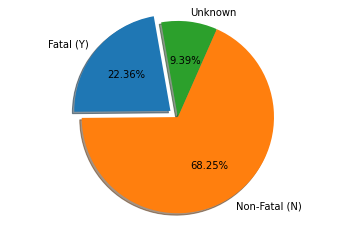

In [50]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Fatal (Y)', 'Non-Fatal (N)', 'Unknown'
sizes = [fatal_y, fatal_n, fatal_un]
explode = (0.1, 0, 0)  # only "explode" the 1rst slice (i.e. 'Fatal)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=100)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('Results_Quantity_Fatal.png', format='png')
plt.show()

#model_graph_source = https://matplotlib.org/3.3.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

Even if we consider all UNKNOWN cases as Fatal, the Non-Fatal cases still greather than Fatal:

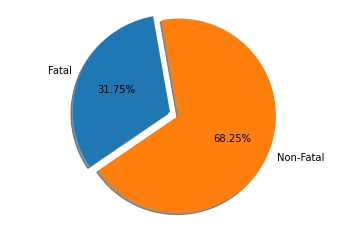

In [51]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Fatal', 'Non-Fatal'
sizes = [fatal_y+fatal_un, fatal_n]
explode = (0.1, 0)  # only "explode" the 1rst slice (i.e. 'Fatal)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=100)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('Results_Quantity_Without_Unknown.png', format='png')
plt.show()

#model_graph_source = https://matplotlib.org/3.3.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

# CURIOSITY:
In this regard, we remind our visitors that more people drown in a single year in the United States than have been killed by sharks throughout the entire world in the last two centuries

In [52]:
(shark['Fatal (Y/N)']=='Y').sum()

1409

In [53]:
#Overview about the years:
shark['Year'].nsmallest(130)

6177       0.0
6178       0.0
6179       0.0
6180       0.0
6181       0.0
         ...  
6176       5.0
6175      77.0
6174     500.0
6173    1543.0
6172    1554.0
Name: Year, Length: 130, dtype: float64

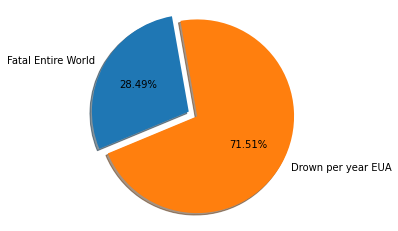

In [54]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
d = (shark['Fatal (Y/N)']=='Y').sum()
labels = 'Fatal Entire World', 'Drown per year EUA'
sizes = [d, 3536]
explode = (0.1, 0)  # only "explode" the 1rst slice (i.e. 'Fatal)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=100)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('Curiosity.png', format='png')
plt.show()

#drown source: https://www.cdc.gov/homeandrecreationalsafety/water-safety/waterinjuries-factsheet.html#:~:text=From%202005%2D2014%2C%20there%20were,drowning%20in%20boating%2Drelated%20incidents.&text=About%20one%20in%20five%20people,are%20children%2014%20and%20younger.
#model_graph_source = https://matplotlib.org/3.3.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

# EXTRA: HOW MANY FATAL WAS PROVOKED?

In [55]:
shark['Type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [56]:
condition1=(shark['Fatal (Y/N)']=='Y')
condition2=(shark['Type']=='Provoked')
provoked = shark[condition1 & condition2]['Fatal (Y/N)'].shape[0]

In [57]:
condition2=(shark['Type']=='Unprovoked')
unprovoked = shark[condition1 & condition2]['Fatal (Y/N)'].shape[0]

In [58]:
condition2=(shark['Type']=='Invalid')
invalid = shark[condition1 & condition2]['Fatal (Y/N)'].shape[0]

In [59]:
condition2=(shark['Type']=='Sea Disaster')
sea_disaster = shark[condition1 & condition2]['Fatal (Y/N)'].shape[0]

In [60]:
condition2=(shark['Type']=='Boating')
boating = shark[condition1 & condition2]['Fatal (Y/N)'].shape[0]

In [61]:
condition2=(shark['Type']=='Boat')
boat = shark[condition1 & condition2]['Fatal (Y/N)'].shape[0]

In [62]:
condition2=(shark['Type']=='Questionable')
questionable = shark[condition1 & condition2]['Fatal (Y/N)'].shape[0]

In [63]:
condition2=(shark['Type']=='Boatomg')
boatomg = shark[condition1 & condition2]['Fatal (Y/N)'].shape[0]

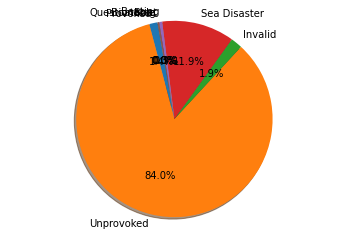

In [64]:
# Chat to show the % of attacks provoked:
labels = 'Provoked', 'Unprovoked', 'Invalid', 'Sea Disaster', 'Boating', 'Boat', 'Questionable', 'Boatomg'
sizes = [provoked, unprovoked,invalid,sea_disaster,boating, boat, questionable, boatomg]
explode = (0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 1rst slice (i.e. 'Fatal)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [65]:
#shark.query('`Fatal (Y/N)` == "Y" and Type == "Provoked"')

# EXTRA: HOW MANY FATAL WAS WOMENS?

In [66]:
condition1=(shark['Fatal (Y/N)']=='Y')
condition2=(shark['Sex ']=='F')
shark[condition1 & condition2]['Fatal (Y/N)'].value_counts()

Y    108
Name: Fatal (Y/N), dtype: int64

In [67]:
#Quantity of shark fatal attack on female / total of shark attack female
shark[condition1 & condition2]['Fatal (Y/N)'].value_counts()/(shark['Sex ']=='F').sum()

Y    0.169545
Name: Fatal (Y/N), dtype: float64

In [68]:
condition1=(shark['Fatal (Y/N)']=='Y')
condition2=(shark['Sex ']=='M')
shark[condition1 & condition2]['Fatal (Y/N)'].value_counts()

Y    1190
Name: Fatal (Y/N), dtype: int64

In [69]:
(shark['Sex ']=='F').value_counts()

False    5665
True      637
Name: Sex , dtype: int64

In [70]:
(shark['Sex ']=='M').sum()+2

5096

In [71]:
#Quantity of shark fatal attack on male / total of shark attack male:
(shark[condition1 & condition2]['Fatal (Y/N)'].value_counts())/((shark['Sex ']=='M').sum()+2)

Y    0.233516
Name: Fatal (Y/N), dtype: float64

# EXTRA: HOW OF THE FATAL DEATHS WAS CAUSED BY THE SPECIE WITH LARGER NUMBER OF CASES?

In [72]:
shark['Species '].value_counts()

White shark                                           163
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
                                                     ... 
1.5 m white-tipped reef shark                           1
 Bull shark, 8'                                         1
Bronze whaler shark, 2.5 m [8.25']  k                   1
3m shark, probably a smooth hound                       1
Possibly a white shark                                  1
Name: Species , Length: 1549, dtype: int64

In [73]:
x=shark.groupby('Species ').count()[['Fatal (Y/N)','Case Number']]

In [74]:
x.nlargest(1,columns=['Case Number'], keep='first')

,Fatal (Y/N),Case Number
Species,,
White shark,163,163


In [75]:
condition3 = (shark['Species ']=='White shark')

In [76]:
print('The quantity of fatal acidents caused by White Sharks is:',shark[condition1 & condition3]['Fatal (Y/N)'].count())

The quantity of fatal acidents caused by White Sharks is: 44


In [77]:
print('The % of deaths caused by White Shark Attacks is:',44/163 * 100)

The % of deaths caused by White Shark Attacks is: 26.993865030674847


In [78]:
condition4=(shark['Type']=='Provoked')

In [79]:
print('Quantity of white shark fatal attacks:',shark[condition1&condition4]['Fatal (Y/N)'].count())

Quantity of white shark fatal attacks: 19


In [80]:
shark[condition1 & condition3]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,original order
155,2017.04.17.a,17-Apr-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,Kelpies near Wylie Bay,Surfing,Laeticia Brouwer,F,17,FATAL,Y,16h00,White shark,"B. Myatt, GSAF",2017.04.17.a Brouwer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.a,6148.0
271,2016.05.31,31-May-2016,2016.0,Unprovoked,AUSTRALIA,Western Australia,"Falcon Beach, Mandurah",Surfing,Ben Gerring,M,29,FATAL,Y,16h00,White shark,"Perth Now, 5/31/2016",2016.05.31-Gerring.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.05.31,6032.0
613,2013.10.11,11-Oct-2013,2013.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Albatros Point, near Jeffrey's Bay",Swimming / snorkeling,Burgert Van Der Westhuizen,M,74,FATAL,Y,11h30,White shark,"JBayNews.com, 10/11/2013",2013.10.11-Vd-Westhuizen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.10.11,5690.0
871,2011.09.04.a,04-Sep-2011,2011.0,Unprovoked,AUSTRALIA,Western Australia,Bunker Bay,Body boarding,Kyle James Burden,M,21,FATAL,Y,13h26,White shark,"Sunshine Coast Daily, 9/5/2011",2011.09.04.a-Burden.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.09.04.a,5432.0
986,2010.09.21,21-Sep-2010,2010.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Between Dyer Island and Pearly Beach,Swimming,Khanyisile Momoza,M,29,FATAL,Y,NaN,White shark,"Cape Argus, 9/25/2010",2010.09.21-Momoza.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.09.21,5317.0
996,2010.08.17,17-Aug-2010,2010.0,Unprovoked,AUSTRALIA,Western Australia,Cowaramup Bay,Surfing,Nicholas Edwards,M,31,FATAL,Y,08h05,White shark,"The Australian, 8/17/2010",2010.08.17-Edwards.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.08.17,5307.0
1051,2010.01.12,12-Jan-2010,2010.0,Unprovoked,SOUTH AFRICA,Western Province,Fish Hoek,Standing,Lloyd Skinner,M,37,FATAL,Y,15h15,White shark,"L. Cohen, Times Live, 1/12/2010",2010.01.12-Skinner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.01.12,5252.0
1096,2009.08.29,29-Aug-2009,2009.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Glentana,Surfing,Gerhard van Zyl,M,25,FATAL,Y,15h30,White shark,"Cape Argus, 8/30/2009, p.1",2009.08.29-VanZyl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.08.29,5207.0
1555,2005.08.24.b,24-Aug-2005,2005.0,Unprovoked,AUSTRALIA,South Australia,Glenelg,Scuba diving,Jarrod Stehbens,M,23,FATAL,Y,16h10,White shark,"Adelaide Advertiser, 8/26/2005",2005.08.24.b-Stehbens.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2005.08.24.b,4748.0
1582,2005.06.04,04-Jun-2005,2005.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Miller's Point,Spearfishing (Free diving),Henri Murray,M,22,FATAL,Y,15h45,White shark,News24.com; SABC; H. Steele,2005.06.04-HenriMurray.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2005.06.04,4721.0
